The equation for the magnetic field along the axis of a thick solenoid, $B_z$ is 
$B_z(0,z)=\frac{\mu_0}{2}j\bigg(f(z+\frac{L}{2})-f(z-\frac{L}{2})\bigg)$, <br> where $f(z)=zln\frac{\rho_{out}+\sqrt{\rho_{out}^2+z^2}}{\rho_{in}+\sqrt{\rho_{in}^2+z^2}}$ and $j=\frac{NI}{(\rho_{out}-\rho_{in})L}$
<br>The focal point is 
$f_l=\frac{4U_k(U_k+2mc^2)}{c^2e^2\int_{-\infty}^{{\infty}}B_z(0,z)^2dz}$


In [16]:
#Load all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad,cumulative_trapezoid, simpson #for integration
import math
import seaborn as sns

In [15]:
#% Plotting routines
def plotLarge():
    #%%
    SMALL_SIZE = 14
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    #plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labelsc
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rcParams["font.family"] = "Times New Roman"

In [10]:
#all the constants used in the calculation, includes
#solenoid parameters, energy of the beam etc.

#Solenoid parameters
r_out= 51 #outer (and inner) radius of the thick solenoid
r_in=30
N=1055 #number of turns
I=1 #current through each turn
L=51.7 #length of the solenoid

mu0=1.25663706e-6 #magnetic permeability (~1.25e-6 in SI units for free space)
E=30e3 #energy of the electron beam in eV
m=9.1093837e-31 #mass of an electron
c=3e8 #speed 
e=1.60217663e-19 #electric charge of an electron

In [11]:
#function defined in the calculation
def f(z):
    return z*math.log((r_out+math.sqrt(r_out**2+z**2))/(r_in+math.sqrt(r_in**2+z**2)))

In [14]:
z=np.arange(-40,100,0.0001) #the distance along the axis where the field is calculated, z=0 is the solenoid
#starting point of the solenoid
j=(N*I)/((r_out-r_in)*L)*1e3
Bz=np.zeros([len(z)])
for i in range(len(z)):
    Bz[i]=((mu0*j)/2)*(f(z[i]+(L/2))-f(z[i]-(L/2)))


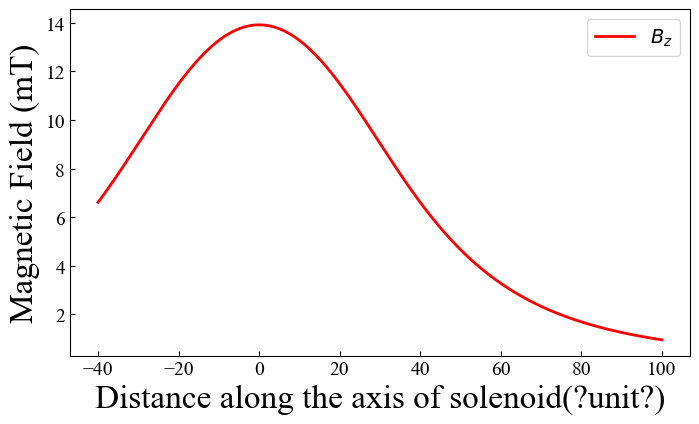

In [23]:
#custom_palette = sns.color_palette("icefire", 3)
plotLarge()
fig,ax=plt.subplots(figsize=(8,4.5))

sns.lineplot(x=z, y=Bz*1000,ax=ax, label='$B_z$',linewidth=2, color='red')

ax.set_xlabel('Distance along the axis of solenoid(?unit?)')
ax.set_ylabel('Magnetic Field (mT)')

#ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(axis='x', which='major', bottom='True', direction='in')
ax.tick_params(axis='y', which='major', left='True', direction='in')
#ax.set_xlim(2.45,3.10)
#ax[0].set_ylim(-0.12,1.00)
#plt.text(2.8,1.6,'?random?')
    
#image_format='svg'
#image_name='300KPlotData_lowTheta.svg'

#fig.savefig(image_name, format=image_format, dpi=1200)

In [25]:
#the fdist is not giving right numbers at this time, probably just the units are off
fdist=(4*E*(E+2*m*c**2))/(c**2*e**2*simpson(Bz**2,z))
print('The focusing distance is %.2f'%(fdist))


The focusing distance is 143553608961246729158501171462144.00
